# ECZACIBAŞI Pharma Sales Predictive Model Implementation

>This project includes the sales prediction model of a product (painkiller). The dataset includes real sales data of this products between 2017-2019. Dataset is provided by Eczacıbaşı. 

>In this notebook, the data is preprocessed (analyzed, scaled, encoded). After that a model is fitted to the data. Then the model is evaluated in terms of valid metrics. 

>The data needs a numerical sales prediction, which means our problem is a regression problem. So that a regression model is used. Moreover, data contins some outliers but these outliers were not a big deal since they are a lot. In other words, they did not acted like outliers, which eased my bussiness. 

>The code have explanations of processes over or under them. For any questions, contact me through: omerosmetu@gmail.com

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sys

In [720]:
df = pd.read_csv(r'C:\Users\Asus\Desktop\Eczacibasi\Product_B.csv')


In [721]:
df.drop(columns='Unnamed: 0', inplace=True)

In [722]:
df.head()

,Period,Province,Quantity,Year,Month,Season,BigCity,Region,DolarS,Kid,Ratio,Interest,CPI(Year),CPI(Month),SalePrice
0,201701,ADANA,4851,2017,1,winter,1,ME,3.7536,190594,86,6,922,246,2.379
1,201701,ADIYAMAN,48,2017,1,winter,0,SE,3.7536,62631,1018,0,922,246,2.379
2,201701,AFYON,1719,2017,1,winter,0,AE,3.7536,52997,74,0,922,246,2.379
3,201701,AKSARAY,1107,2017,1,winter,0,CE,3.7536,33598,835,0,922,246,2.379
4,201701,AMASYA,537,2017,1,winter,0,BS,3.7536,19738,598,0,922,246,2.379


The provided data only contains quantity and time period. It is enriched with season, region, big city status, number of kids, kid/adult ratio, interest, annual and monthly CPI, dollar/TL cuurency and sale price.

,Period,Quantity,Year,Month,BigCity,DolarS,Kid,Ratio,Interest,CPI(Year),CPI(Month),SalePrice
Period,1.000000,-0.275528,0.999394,-0.187009,-0.001617,0.532638,-0.011699,-0.040965,0.075229,0.267086,-0.097859,0.065798
Quantity,-0.275528,1.000000,-0.274101,0.015981,0.543234,-0.163103,0.582643,-0.026154,0.122020,-0.017407,0.035981,-0.074128
Year,0.999394,-0.274101,1.000000,-0.221095,-0.001667,0.528531,-0.011787,-0.040970,0.076157,0.268004,-0.089518,0.066692
Month,-0.187009,0.015981,-0.221095,1.000000,0.001743,0.007182,0.004885,0.008499,-0.041540,-0.080414,-0.215391,-0.038659
BigCity,-0.001617,0.543234,-0.001667,0.001743,1.000000,-0.000541,0.485372,0.109291,0.131559,-0.000446,-0.000279,-0.001296
DolarS,0.532638,-0.163103,0.528531,0.007182,-0.000541,1.000000,-0.006029,-0.024031,0.060701,0.221220,-0.131325,0.093548
Kid,-0.011699,0.582643,-0.011787,0.004885,0.485372,-0.006029,1.000000,0.165894,0.136038,-0.001352,0.000891,-0.005442
Ratio,-0.040965,-0.026154,-0.040970,0.008499,0.109291,-0.024031,0.165894,1.000000,-0.118713,-0.015424,0.002026,-0.003260
Interest,0.075229,0.122020,0.076157,-0.041540,0.131559,0.060701,0.136038,-0.118713,1.000000,-0.029010,0.023722,0.095437
CPI(Year),0.267086,-0.017407,0.268004,-0.080414,-0.000446,0.221220,-0.001352,-0.015424,-0.029010,1.000000,0.047703,-0.314041


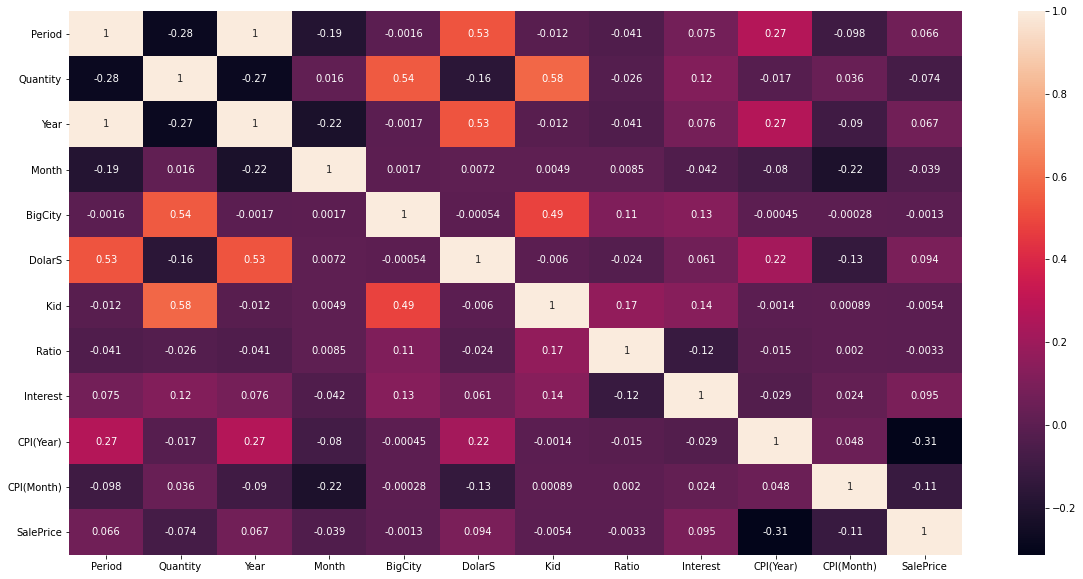

In [723]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                annot=True)

    return corr
  
show_correlations(df)

In [724]:
df.drop(columns=['DolarS', 'Kid', 'Year', 'CPI(Year)', 'CPI(Month)', 'Ratio'], inplace=True)

By looking at the correlation matrix, dollar/TL currency, nmber of kids, kid/adult ratio and CPI values are dropped.

In [725]:
df.head()

,Period,Province,Quantity,Month,Season,BigCity,Region,Interest,SalePrice
0,201701,ADANA,4851,1,winter,1,ME,6,2.379
1,201701,ADIYAMAN,48,1,winter,0,SE,0,2.379
2,201701,AFYON,1719,1,winter,0,AE,0,2.379
3,201701,AKSARAY,1107,1,winter,0,CE,0,2.379
4,201701,AMASYA,537,1,winter,0,BS,0,2.379


,Period,Quantity,Month,BigCity,Interest,SalePrice
Period,1.000000,-0.275528,-0.187009,-0.001617,0.075229,0.065798
Quantity,-0.275528,1.000000,0.015981,0.543234,0.122020,-0.074128
Month,-0.187009,0.015981,1.000000,0.001743,-0.041540,-0.038659
BigCity,-0.001617,0.543234,0.001743,1.000000,0.131559,-0.001296
Interest,0.075229,0.122020,-0.041540,0.131559,1.000000,0.095437
SalePrice,0.065798,-0.074128,-0.038659,-0.001296,0.095437,1.000000


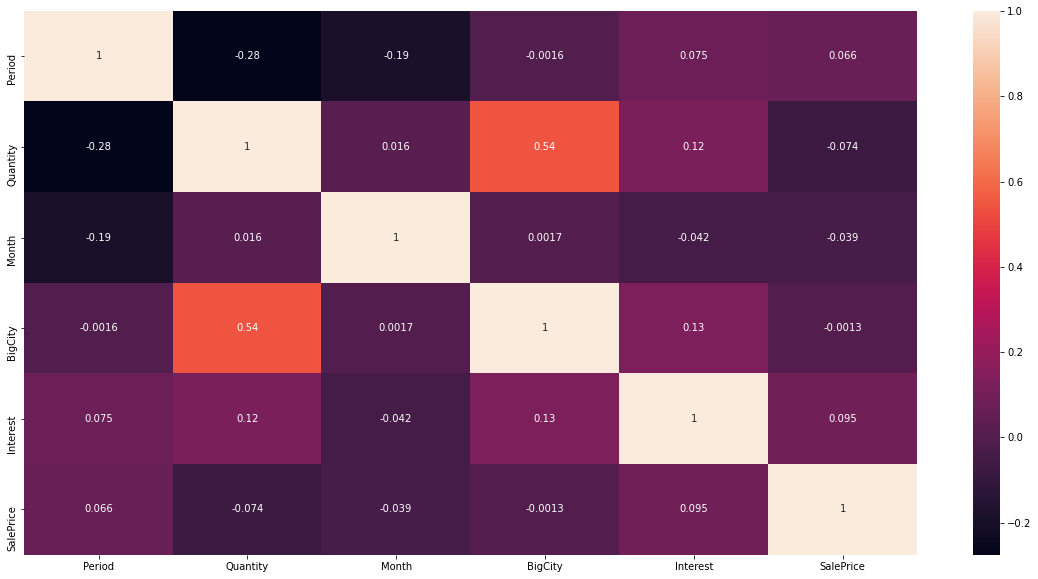

In [726]:
show_correlations(df)

The first 2696 rows are for the train and test set. Rest is for forecasting 2020's first 4 months.

In [727]:
df = df[:2696]
df.head()

,Period,Province,Quantity,Month,Season,BigCity,Region,Interest,SalePrice
0,201701,ADANA,4851,1,winter,1,ME,6,2.379
1,201701,ADIYAMAN,48,1,winter,0,SE,0,2.379
2,201701,AFYON,1719,1,winter,0,AE,0,2.379
3,201701,AKSARAY,1107,1,winter,0,CE,0,2.379
4,201701,AMASYA,537,1,winter,0,BS,0,2.379


The season column contains 4 values. These values can be encoded with one hot encoding. 

In [728]:
df_season_encoded=pd.get_dummies(df['Season'], drop_first=False)

In [729]:
df_season_encoded.head()

,fall,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [730]:
df.drop(columns='Season', inplace = True)

In [731]:
pd.concat([df, df_season_encoded], axis=1, join='inner')

,Period,Province,Quantity,Month,BigCity,Region,Interest,SalePrice,fall,spring,summer,winter
0,201701,ADANA,4851,1,1,ME,6,2.379,0,0,0,1
1,201701,ADIYAMAN,48,1,0,SE,0,2.379,0,0,0,1
2,201701,AFYON,1719,1,0,AE,0,2.379,0,0,0,1
3,201701,AKSARAY,1107,1,0,CE,0,2.379,0,0,0,1
4,201701,AMASYA,537,1,0,BS,0,2.379,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2691,201912,ÇORUM,125,12,0,BS,0,3.651,0,0,0,1
2692,201912,İSTANBUL,3137,12,1,MA,46,3.651,0,0,0,1
2693,201912,İZMİR,4770,12,1,AE,28,3.651,0,0,0,1
2694,201912,ŞANLIURFA,216,12,1,SE,0,3.651,0,0,0,1


In [732]:
df.dtypes

Period         int64
Province      object
Quantity       int64
Month          int64
BigCity        int64
Region        object
Interest       int64
SalePrice    float64
dtype: object

The rest of the features have a lot of values so that using label encoders, standard scalers and Min-Max scalers are better options. The period information is scaled with Min-Max scaler. Regon and province information is encoded with label encoder. 

In [733]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, MinMaxScaler

In [737]:
df_test = df

In [738]:
le_province = LabelEncoder()
le_region = LabelEncoder()

In [739]:
df['Province'] = le_province.fit_transform(df['Province'])

In [740]:
df['Region'] = le_region.fit_transform(df['Region'])

In [741]:
df['Province'] = le_province.fit_transform(df['Province'])

In [742]:
df['Region'] = le_region.fit_transform(df['Region'])

In [743]:
df

,Period,Province,Quantity,Month,BigCity,Region,Interest,SalePrice
0,201701,0,4851,1,1,5,6,2.379
1,201701,1,48,1,0,6,0,2.379
2,201701,2,1719,1,0,0,0,2.379
3,201701,3,1107,1,0,2,0,2.379
4,201701,4,537,1,0,1,0,2.379
...,...,...,...,...,...,...,...,...
2691,201912,70,125,12,0,1,0,3.651
2692,201912,71,3137,12,1,4,46,3.651
2693,201912,72,4770,12,1,0,28,3.651
2694,201912,73,216,12,1,6,0,3.651


In [744]:
df_test = df 

In [745]:
le_period = LabelEncoder()

In [746]:
df['Period'] = le_period.fit_transform(df['Period'])

After the encoding process, the data is scaled with standard scaler and Min-Max scaler. Period is scaled with Min-Max. Rest is scaled with standard scaler. 

In [748]:
df_test = df

In [749]:
df.columns

Index(['Period', 'Province', 'Quantity', 'Month', 'BigCity', 'Region',
       'Interest', 'SalePrice'],
      dtype='object')

In [750]:
X = df[['Province', 'Month', 'BigCity', 'Region',
       'Interest', 'SalePrice']]
X_period = df[['Period']]
y = df[['Quantity']]

In [751]:
scaler = StandardScaler()
minmax_period = MinMaxScaler(feature_range = (0,1))
minmax = MinMaxScaler(feature_range = (0,1))

In [752]:
X = scaler.fit_transform(X)
y = minmax.fit_transform(y)
X_period = minmax_period.fit_transform(X_period)

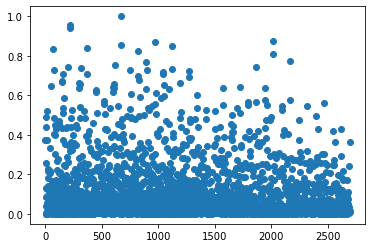

In [753]:
plt.scatter(range(len(y)), y)

In [755]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


In [756]:
df_X = pd.DataFrame(X, columns = ['Province', 'Month', 'BigCity', 'Region',
       'Interest', 'SalePrice'])
df_X_period = pd.DataFrame(X_period, columns = ['Period'])
df_y = pd.DataFrame(y, columns = ['Quantity'])


In [757]:
df_pr = pd.concat([df_X_period, df_X], axis=1, join='inner')

In [758]:
df_pr = pd.concat([df_pr, df_y], axis=1, join='inner')

In [654]:
df_pr

,Period,Province,Month,BigCity,Region,Interest,SalePrice,Quantity
0,0.0,-1.685497,-1.445662,1.295108,1.247098,-0.185298,-1.261602,0.371687
1,0.0,-1.642817,-1.445662,-0.772136,1.784594,-0.486997,-1.261602,0.003754
2,0.0,-1.600138,-1.445662,-0.772136,-1.440383,-0.486997,-1.261602,0.131760
3,0.0,-1.557458,-1.445662,-0.772136,-0.365391,-0.486997,-1.261602,0.084878
4,0.0,-1.514779,-1.445662,-0.772136,-0.902887,-0.486997,-1.261602,0.041213
...,...,...,...,...,...,...,...,...
3015,1.0,0.960625,-0.589659,-0.772136,-0.902887,-0.486997,2.366560,0.000077
3016,1.0,0.235076,-0.589659,1.295108,0.709602,3.384805,2.366560,0.000077
3017,1.0,-1.173344,-0.589659,-0.772136,-0.902887,-0.486997,2.366560,0.000077
3018,1.0,1.302060,-0.589659,1.295108,0.172106,0.870648,2.366560,0.000077


The scaled and encoded dataset is divided into two. The df_pr_m contains the train and the test data. The df_pr_pred includes the forecasting part. 

In [762]:
df_pr_m = df_pr[:2696]
df_pr_pred = df_pr[2696:]

In [765]:
X_m = df_pr_m[['Period', 'Province', 'Month', 'BigCity', 'Region',
       'Interest', 'SalePrice']]
y_m = df_pr_m[['Quantity']]

The function 'checker' is a function written by me that compares y values one by one. In the further lines, I used sklearn metrics but just in case, I just hold it in here.

In [666]:
def checker(y_test, y_pred_test):
    t = 0
    f = 0
    for i in range(100):
        a = np.array(y_test)[i] 
        b = y_pred_test[i]
        if abs(a - b)<0.01:
            t += 1
            print('t', a, 'p', b, 'TRUE!!!!')
        else: 
            f += 1
            print('*****FALSE', 't', a, 'p', b)
        
    return 't', t, 'f', f

the train and the test datasets are created. The main dataset is roughly divided into 3 and 2 parst of it is the train part. Rest is the test part. 

In [768]:
from sklearn.model_selection import train_test_split

In [769]:
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.3, random_state=True)

In [770]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


For this data, Ada Boost Regressor is used for forecasting. Ada Bost gives good results. But with more fine tuning, other models may give better results.

In [771]:
from sklearn.ensemble import AdaBoostRegressor

In [772]:
model = AdaBoostRegressor(n_estimators = 10, loss='square')

In [773]:
model = model.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [774]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

After predictions, an inverse transform is applied in order to evaluate the model with its real data. 

In [782]:
y_train_pred = pd.DataFrame(y_train_pred, columns=['Quantity'])
y_test_pred = pd.DataFrame(y_test_pred, columns=['Quantity']) 
y_train = pd.DataFrame(y_train, columns=['Quantity']) 
y_test = pd.DataFrame(y_test, columns=['Quantity']) 

In [783]:
y_train = minmax.inverse_transform(y_train)
y_train_pred = minmax.inverse_transform(y_train_pred)
y_test = minmax.inverse_transform(y_test)
y_test_pred = minmax.inverse_transform(y_test_pred)


As error metric, mean absolute percentage error (MAPE) is used. 

In [784]:
error_train = mean_absolute_percentage_error(y_train, y_train_pred)
error_test = mean_absolute_percentage_error(y_test, y_test_pred)

In [779]:
error_train, error_test

(6.201961443620425, 4.717710402768906)

As seen in the line above, MAPE scores of train and test sets are below 10%. This score can be applied as a good score. The graphs below shows the comparison of train and test y values with their predicted ones. 

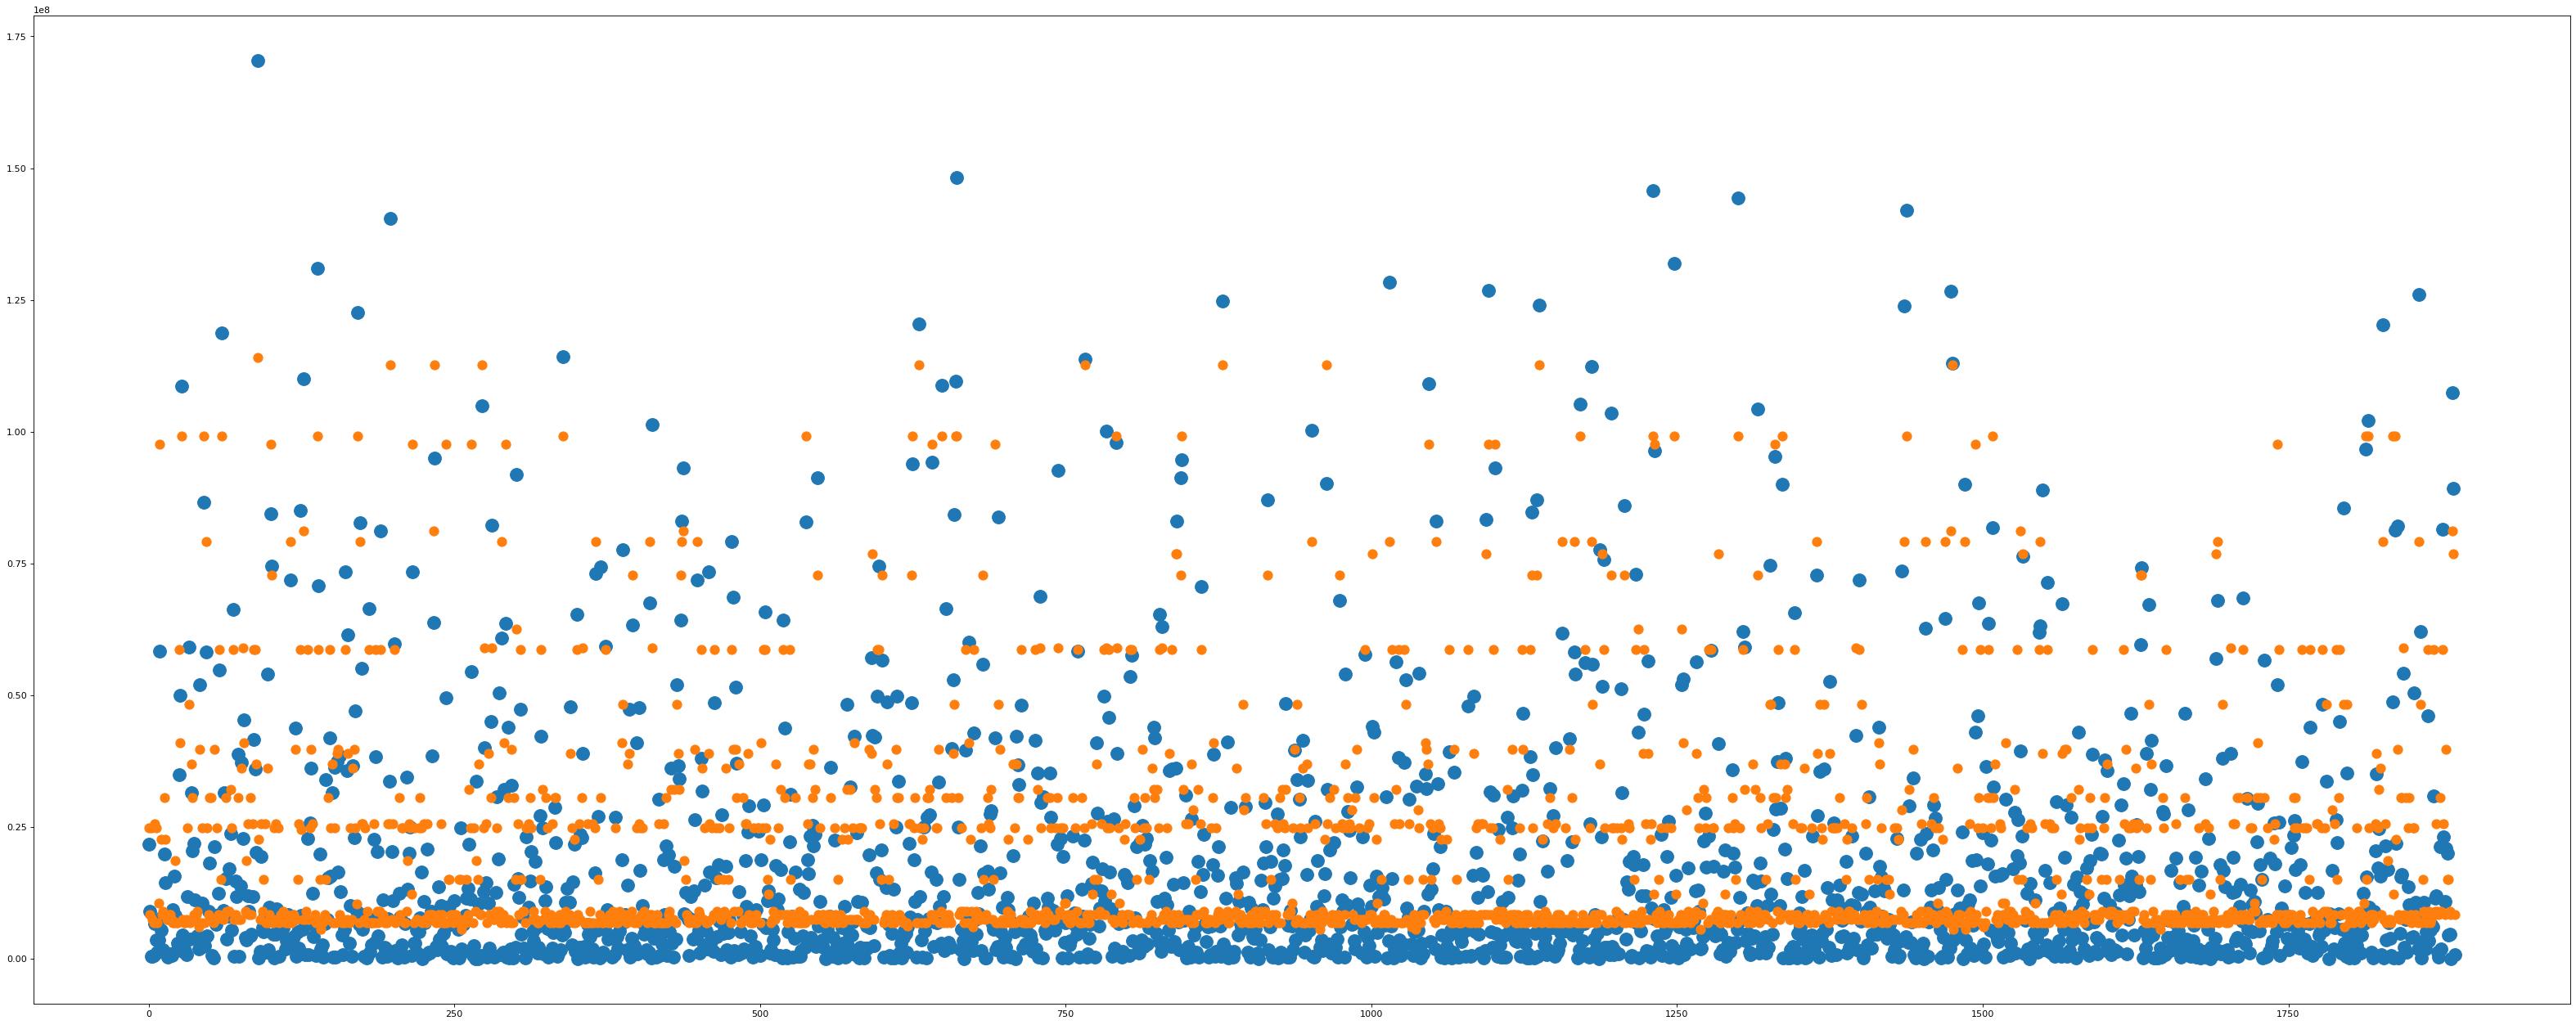

In [785]:
figure(figsize=(50, 20), dpi=80)
plt.scatter(range(len(y_train)), y_train, s=200)
plt.scatter(range(len(y_train)), y_train_pred, s=100)

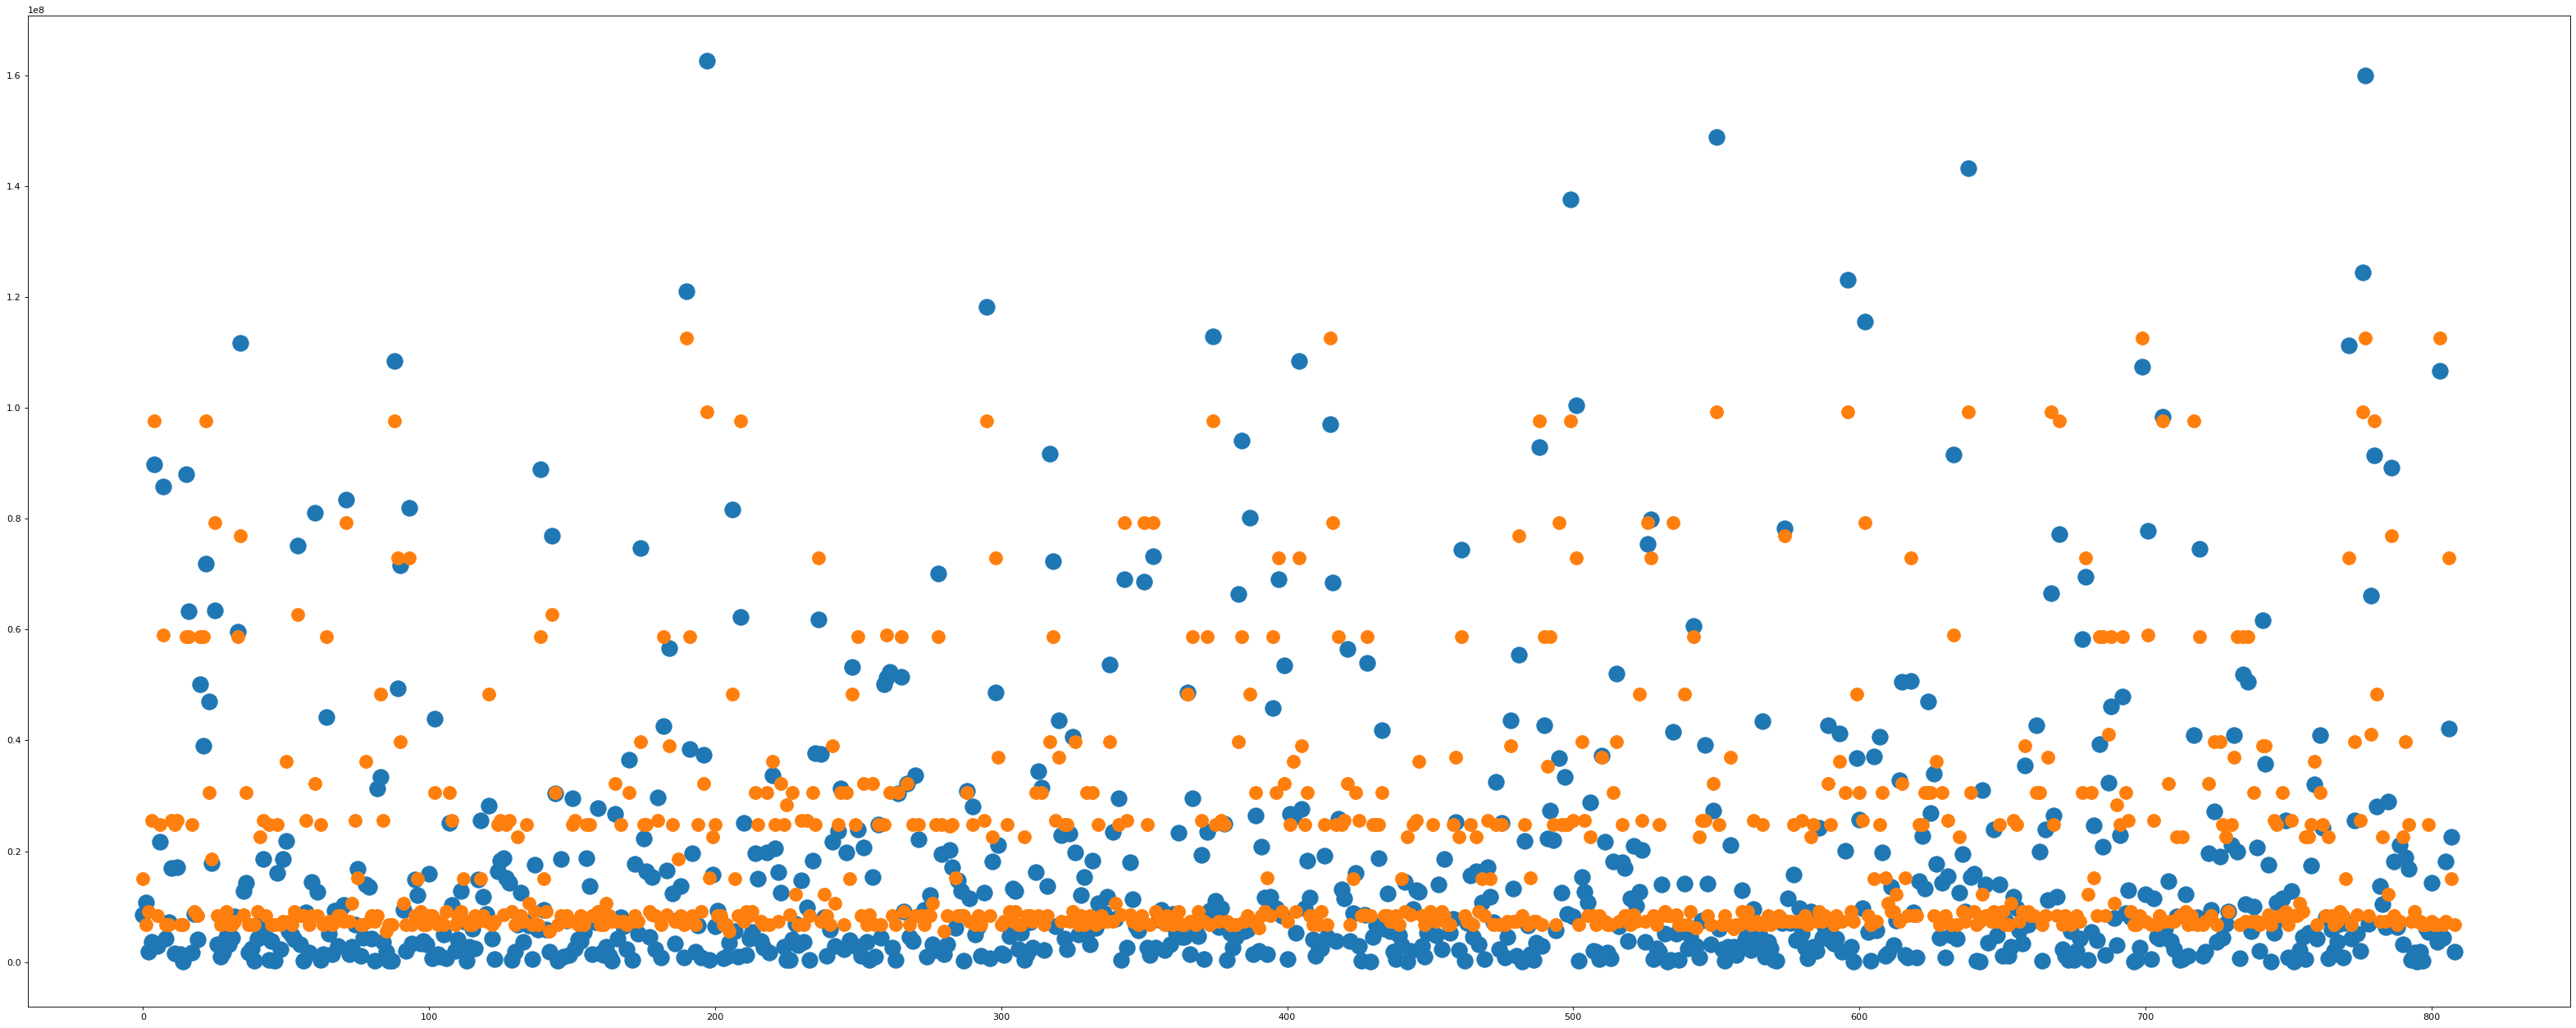

In [786]:
figure(figsize=(50, 20), dpi=80)
plt.scatter(range(len(y_test)), y_test, s=300)
plt.scatter(range(len(y_test)), y_test_pred, s=200)